# Polynomial Regression

This notebook is intended to run with a `SageMath` kernel.

In [1]:
from typing import List

In [2]:
def leastSquaresDegreeN(listx: List[float], listy: List[float], degree: int):
    n = len(listx)
    lx = []
    ly = []
    for i in range(len(listx)):
        a = 1
        lx.append(1)
        while (a <= degree):
            lx.append((listx[i])**a)
            a = a + 1
    for i in range(len(listy)):
        ly.append(listy[i])
    X = matrix(n, lx)
    Y = matrix(n, ly)
    return (X.T*X).inverse()*X.T*Y

In [3]:
def coeff_to_line(coeff):
    """Converts a vector of coefficients into a function."""
    line(x) = 0
    for i,a in enumerate(coeff):
        line(x) = line(x) + a[0]*x^i
    return line

In [4]:
def plot_fit(xs, ys, line, deg):
    """Plots all the points and the line."""
    points = []
    for x,y in zip(xs,ys):
        points.append((x,y))
    p1 = point(points)
    var('x')
    p2 = plot(line, min(xs), max(xs), legend_label = f'Best fit line of degree {deg}')
    return p1+p2

In [5]:
def plot_data(xs, ys):
    points = []
    for x,y in zip(xs,ys):
        points.append((x,y))
    return point(points)

In [6]:
xs = [-7,-5,-3,-1,1,3,5,7]
ys = [18.5,22.6,27.2,31.2,33.0,44.9, 49.4, 35.0]
deg = 3

In [7]:
coeff = leastSquaresDegreeN(xs, ys, deg)
line = coeff_to_line(coeff)
show(line)

x |--> -0.0466540404040404*x^3 - 0.135119047619048*x^2 + 3.53810425685426*x + 35.5625000000000

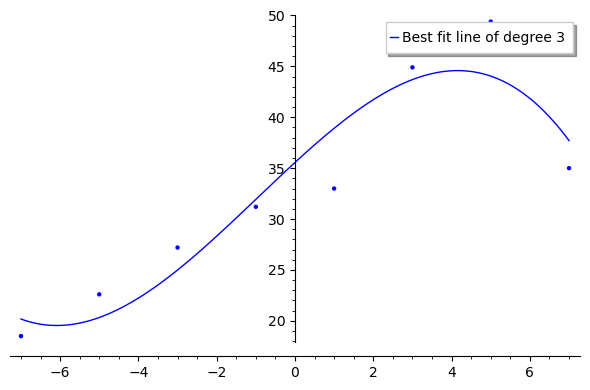

In [8]:
plot_fit(xs, ys, line, deg)

# Forward Selection Procedure

Suppose we have a dependant variable and an independant variable and want to fit a polynomial to the data. However we don't know what should be the degree of the polynomial. One possible approach is to successively fit the models in increasing order and test the significance of regression coefficients at each step of model fitting. Keep the order increasing until t-test for the highest
order term is nonsignificant. This is called a forward selection procedure. 

## Generating Data

In [9]:
import numpy as np

In [10]:
# Randomly Generate Data
np.random.seed(222)
X_data = 3.5*np.random.rand(200)
Y_data = 0.8*X_data**3 - 4*X_data**2 + 4*X_data + 2 + 0.5*np.random.randn(200)

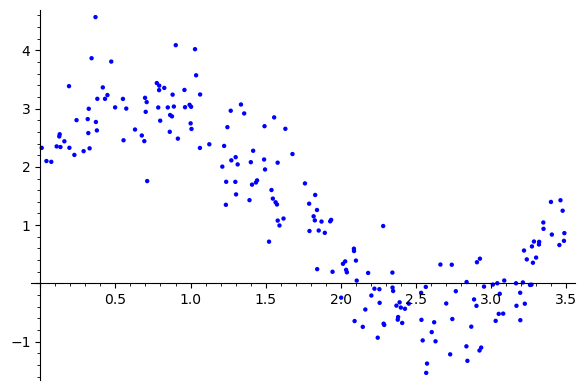

In [11]:
plot_data(X_data, Y_data)

## Testing Significance of Leading Term

In [12]:
from scipy import stats

In [13]:
def compute_SSR(xs, ys, line):
    """
    Computes the sum of squares regression i.e due to (b_k...b_1|b_0).
    Note: MSR = SSR/k
    """
    Y_hat = [line(x) for x in xs]
    Y_bar = sum(ys)/len(ys)
    return sum([(y_hat-y_bar)**2 for y_hat,y_bar in zip(Y_hat, [Y_bar for i in range(len(Y_hat))])])

def compute_SSE(xs, ys, line):
    """
    Computes the sum of squares error i.e residual.
    Note: s² = MSE = SSE/(n-k-1)
    """
    Y_hat = [line(x) for x in xs]
    return sum((y-y_hat)**2 for y,y_hat in zip(ys, Y_hat))

def compute_SST(xs, ys, line):
    """
    Computes the total sum of squares i.e total, corrected.
    Note: SST = SSR + SSE
    """
    return compute_SSR(xs, ys, line) + compute_SSE(xs, ys, line)

def test_significance_of_leading_term(xs, ys, deg):
    """
    Systematically tests the significance of the leading term.
        H₀: βₖ = 0
        Hₐ: βₖ ≠ 0
    """
    coeff = leastSquaresDegreeN(xs, ys, deg)
    line(x) = 0
    for i,a in enumerate(coeff):
        line(x) = line(x) + a[0]*x^i

    MSE = compute_SSE(xs, ys, line)/(len(xs)-deg-1)
    SSR_k = compute_SSR(xs, ys, line)

    coeff_less_1 = leastSquaresDegreeN(xs, ys, deg-1)
    line_less_1(x) = 0
    for i,a in enumerate(coeff_less_1):
        line_less_1(x) = line_less_1(x) + a[0]*x^i

    SSR_k_minus_1 = compute_SSR(xs, ys, line_less_1)
    F_score = float((SSR_k - SSR_k_minus_1)/MSE)
    p_val = stats.f.sf(F_score,1,len(xs)-deg-1)
    return F_score , p_val

## Fitting Polynomials of Varying Degree

Select Degree:  1

F-score 15.200242348152374
p-value 0.00799551341586742


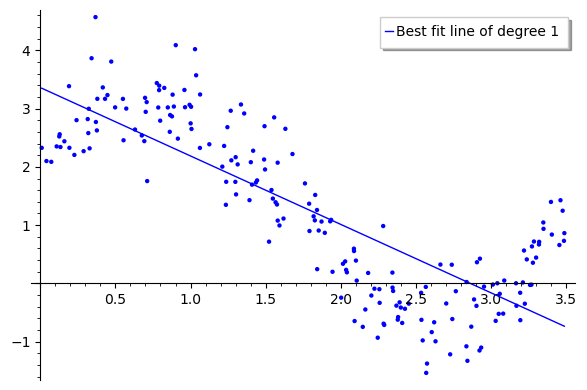

Select Degree:  2

F-score 1.455064516265661
p-value 0.28167434946414066


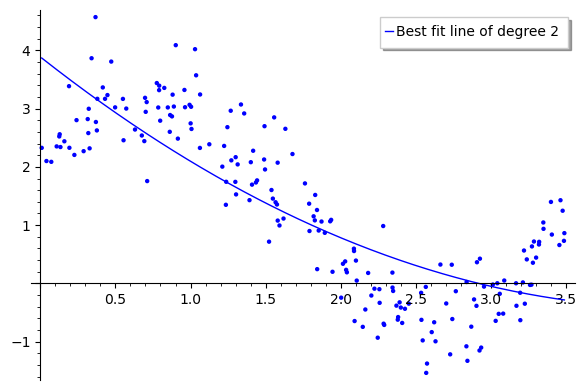

Select Degree:  3

F-score 3.853546276411063
p-value 0.12113101381324996


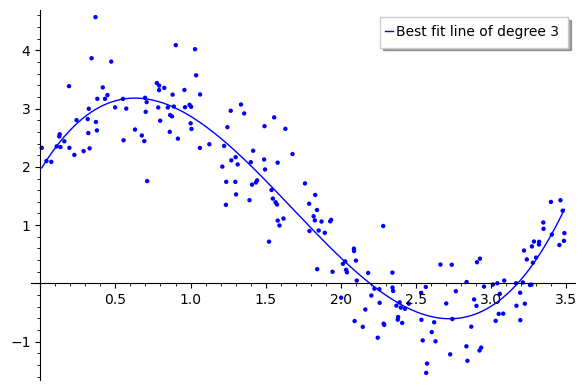

Select Degree:  4

F-score 9.296233785818913
p-value 0.05547294699873177


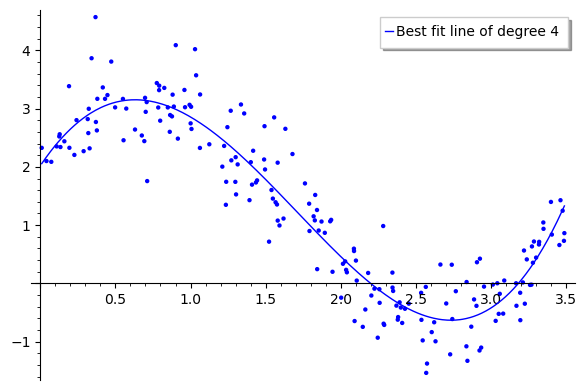

Select Degree:  

In [14]:
while 1==1:
    deg = int(input("Select Degree: "))
    coeff = leastSquaresDegreeN(X_data, Y_data, deg)
    line = coeff_to_line(coeff)
    f, p = test_significance_of_leading_term(xs, ys, deg)
    print(f"F-score {f}")
    print(f"p-value {p}")
    show(plot_fit(X_data, Y_data, line, deg))